# Gradient Decent

In [23]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [24]:
df=pd.read_csv('C:/Users/ADMIN/MLA/forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
511,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
512,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
513,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


iteration1:Cost8.520663689320388,Weight[0.16848718],Bias[0.01423977]
iteration2:Cost5.649066416732025,Weight[0.18349347],Bias[0.01588766]
iteration3:Cost5.509758283671153,Weight[0.1867544],Bias[0.01696622]
iteration4:Cost5.502234625548217,Weight[0.18743584],Bias[0.01791961]
iteration5:Cost5.501067493662207,Weight[0.18755077],Bias[0.01884539]
iteration6:Cost5.500207227435601,Weight[0.18754131],Bias[0.01976498]
iteration7:Cost5.499362038595961,Weight[0.18750452],Bias[0.02068309]
iteration8:Cost5.498517853470439,Weight[0.18746174],Bias[0.02160076]
iteration9:Cost5.497673993160311,Weight[0.18741766],Bias[0.0225182]
iteration10:Cost5.496830424825737,Weight[0.18737329],Bias[0.02343546]
iteration11:Cost5.495987146787723,Weight[0.18732886],Bias[0.02435257]
iteration12:Cost5.495144158870257,Weight[0.18728443],Bias[0.02526952]
iteration13:Cost5.494301460969854,Weight[0.18724],Bias[0.02618631]
iteration14:Cost5.493459052986565,Weight[0.18719558],Bias[0.02710295]
iteration15:Cost5.492616934820638,

iteration136:Cost5.392829914100664,Weight[0.18183322],Bias[0.13775728]
iteration137:Cost5.39202241582454,Weight[0.18178973],Bias[0.13865472]
iteration138:Cost5.391215195355637,Weight[0.18174624],Bias[0.13955201]
iteration139:Cost5.3904082525983785,Weight[0.18170277],Bias[0.14044914]
iteration140:Cost5.389601587457223,Weight[0.1816593],Bias[0.14134611]
iteration141:Cost5.38879519983666,Weight[0.18161584],Bias[0.14224294]
iteration142:Cost5.387989089641215,Weight[0.18157239],Bias[0.14313961]
iteration143:Cost5.387183256775439,Weight[0.18152894],Bias[0.14403612]
iteration144:Cost5.386377701143926,Weight[0.1814855],Bias[0.14493248]
iteration145:Cost5.385572422651299,Weight[0.18144207],Bias[0.14582868]
iteration146:Cost5.3847674212022065,Weight[0.18139865],Bias[0.14672474]
iteration147:Cost5.383962696701342,Weight[0.18135523],Bias[0.14762063]
iteration148:Cost5.383158249053422,Weight[0.18131182],Bias[0.14851638]
iteration149:Cost5.3823540781632015,Weight[0.18126842],Bias[0.14941197]
iterati

C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\ma\core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


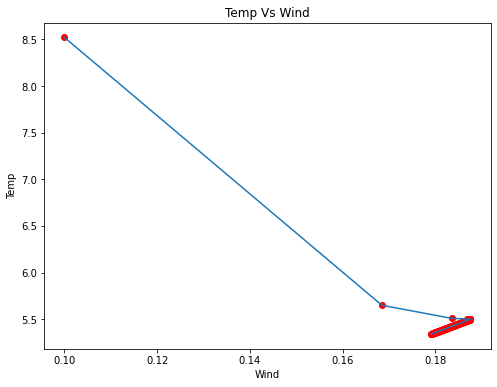

Estimated Weight: [0.17906486]
Estimated Bias: [0.1948833]


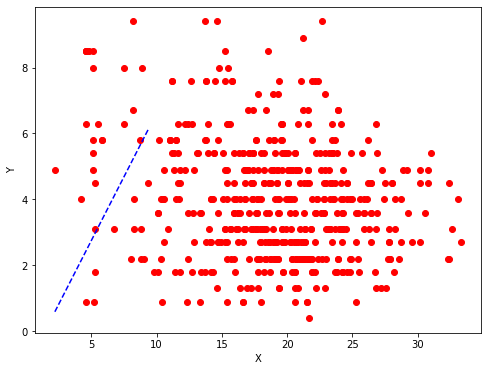

In [25]:
def mean_squared_error(y_test,y_pred):
    cost = np.sum((y_test-y_pred)**2)/len(y_test)
    return cost
#gradient descent function
def gradient_descent(x,y,iterations=1000,learning_rate=0.001,stopping_threshold=1e-6):
    current_weight=0.1
    current_bias=0.01
    iterations=iterations
    learning_rate=learning_rate
    n=float(len(x))
    costs=[]
    weights=[]
    previous_cost=None
    #Estimation of optimal parameters
    for i in range(iterations):
        #making predictions
        y_pred=(current_weight*x)+current_bias
        #calculating the current cost
        current_cost = mean_squared_error(y,y_pred)
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
        previous_cost = current_cost
        costs.append(current_cost)
        weights.append(current_weight)
        #calculating the gradients
        weight_derivative = -(2/n)*sum(x*(y-y_pred))
        bias_derivative = -(2/n)*sum(y-y_pred)
        #updating weights and bias
        current_weight = current_weight - (learning_rate*weight_derivative)
        current_bias = current_bias - (learning_rate*bias_derivative)
        #printing the parameters for each 1000th iterative
        print(f"iteration{i+1}:Cost{current_cost},Weight{current_weight},Bias{current_bias}")
    #visualizing the weights and cost at for all iterations
    plt.figure(figsize=(8,6))
    plt.plot(weights,costs)
    plt.scatter(weights,costs,marker='o',color='red')
    plt.title("Temp Vs Wind")
    plt.ylabel("Temp")
    plt.xlabel("Wind")
    plt.show()
    return current_weight,current_bias
 
def main():
    x=df['temp'].values.reshape(-1,1)
    y=df['wind'].values.reshape(-1,1)
    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(x, y, iterations=200)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
    # Making predictions using estimated parameters
    y_pred = estimated_weight*x + estimated_bias
    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker='o', color='red')
    plt.plot([min(x), max(y)], [min(y_pred), max(y_pred)], color='blue',markerfacecolor='red',markersize=10,linestyle='dashed') 
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

if __name__=="__main__":
	main()

In [26]:
#observations
#In first plot we can observe temperature approaching local minima
#In second plot we can observe the best fit line obtained using gradient descent

In [27]:
df = pd.read_csv("C:/Users/ADMIN/Downloads/sin2x (1).csv")
df


,x,y
0,0.1,0.499167
1,0.2,0.993347
2,0.3,1.477601
3,0.4,1.947092
4,0.5,2.397128
5,0.6,2.823212
6,0.7,3.221088
7,0.8,3.586780
8,0.9,3.916635
9,1.0,4.207355


iteration1:Cost9.297713488950658,Weight[0.12069565],Bias[0.01306575]
iteration2:Cost8.865164392802402,Weight[0.1409041],Bias[0.01605441]
iteration3:Cost8.452770045293928,Weight[0.16063684],Bias[0.0189678]
iteration4:Cost8.059591237928313,Weight[0.17990507],Bias[0.02180772]
iteration5:Cost7.684732529462854,Weight[0.19871976],Bias[0.02457589]
iteration6:Cost7.327340206347799,Weight[0.2170916],Bias[0.02727401]
iteration7:Cost6.986600338208962,Weight[0.23503102],Bias[0.02990375]
iteration8:Cost6.661736923945188,Weight[0.25254823],Bias[0.03246672]
iteration9:Cost6.3520101242179745,Weight[0.26965316],Bias[0.03496451]
iteration10:Cost6.056714576307374,Weight[0.28635555],Bias[0.03739866]
iteration11:Cost5.775177787495888,Weight[0.30266489],Bias[0.03977067]
iteration12:Cost5.506758603320937,Weight[0.31859043],Bias[0.04208202]
iteration13:Cost5.250845747207031,Weight[0.33414123],Bias[0.04433414]
iteration14:Cost5.006856428151309,Weight[0.34932613],Bias[0.04652844]
iteration15:Cost4.7742350132911

C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\ma\core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


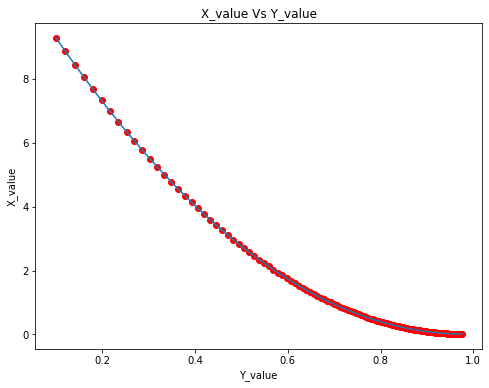

Estimated Weight: [0.97486321]
Estimated Bias: [0.11034969]


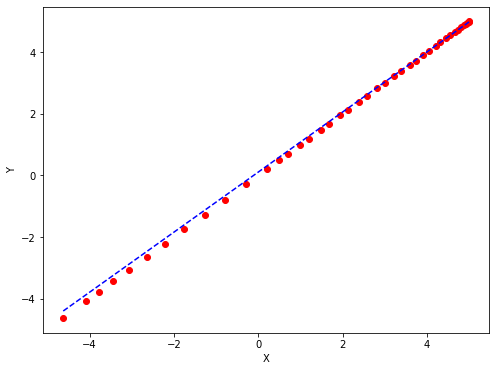

In [28]:
def mean_squared_error(y_test,y_pred):
    cost = np.sum((y_test-y_pred)**2)/len(y_test)
    return cost
#gradient descent function
def gradient_descent(x,y,iterations=1000,learning_rate=0.001,stopping_threshold=1e-6):
    current_weight=0.1
    current_bias=0.01
    iterations=iterations
    learning_rate=learning_rate
    n=float(len(x))
    costs=[]
    weights=[]
    previous_cost=None
    #Estimation of optimal parameters
    for i in range(iterations):
        #making predictions
        y_pred=(current_weight*x)+current_bias
        #calculating the current cost
        current_cost = mean_squared_error(y,y_pred)
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
        previous_cost = current_cost
        costs.append(current_cost)
        weights.append(current_weight)
        #calculating the gradients
        weight_derivative = -(2/n)*sum(x*(y-y_pred))
        bias_derivative = -(2/n)*sum(y-y_pred)
        #updating weights and bias
        current_weight = current_weight - (learning_rate*weight_derivative)
        current_bias = current_bias - (learning_rate*bias_derivative)
        #printing the parameters for each 1000th iterative
        print(f"iteration{i+1}:Cost{current_cost},Weight{current_weight},Bias{current_bias}")
    #visualizing the weights and cost at for all iterations
    plt.figure(figsize=(8,6))
    plt.plot(weights,costs)
    plt.scatter(weights,costs,marker='o',color='red')
    plt.title("X_value Vs Y_value")
    plt.ylabel("X_value")
    plt.xlabel("Y_value")
    plt.show()
    return current_weight,current_bias
 
def main():
    x=df.iloc[:,1:2].values
    y=df['y'].values.reshape(-1,1)
    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(x, y, iterations=200)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
    # Making predictions using estimated parameters
    y_pred = estimated_weight*x + estimated_bias
    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker='o', color='red')
    plt.plot([min(x), max(y)], [min(y_pred), max(y_pred)], color='blue',markerfacecolor='red',markersize=10,linestyle='dashed') 
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

if __name__=="__main__":
	main()

In [16]:
#Observations
#In first plot we can observe that x_value is approaching local minima
#In second plot we can observe that the best fit line is obtained using gradient descent